In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
advertising_multi = pd.read_csv('https://raw.githubusercontent.com/sahilb8/ML_Practice/master/data/advertising.csv')

In [ ]:
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


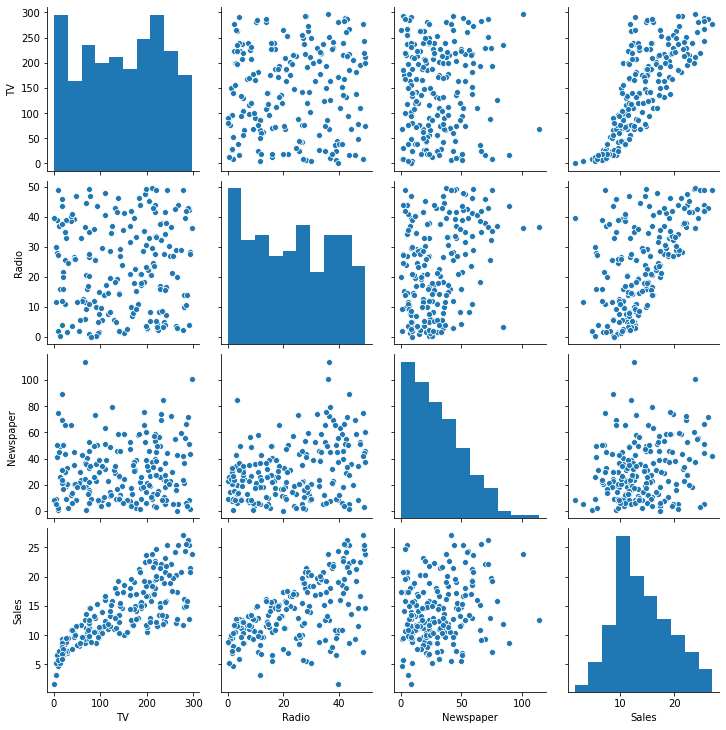

In [ ]:
#pairplot between all possible pair of columns
sns.pairplot(advertising_multi)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


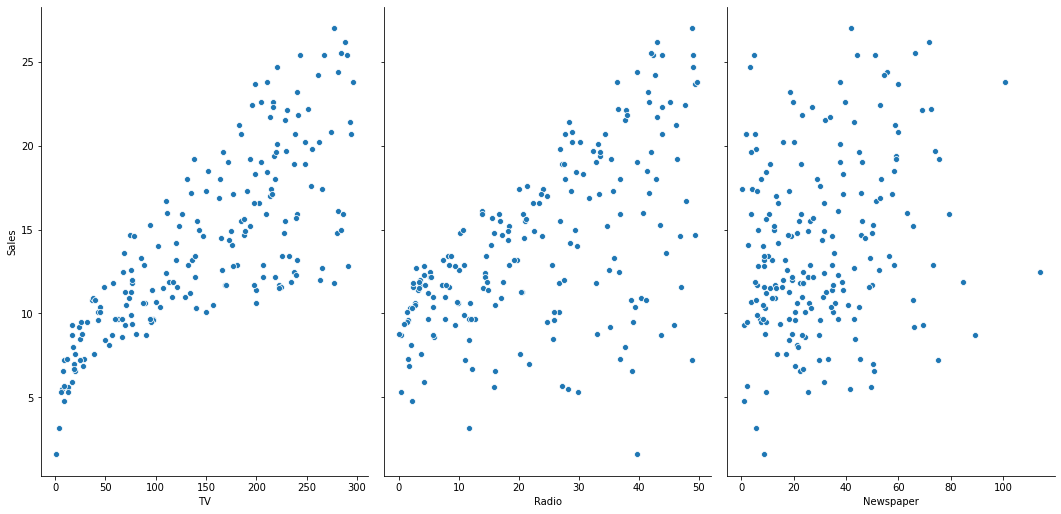

In [ ]:
#visualising sales wrt all the mediums
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7)

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X = advertising_multi[['TV', 'Radio', 'Newspaper']]

In [ ]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y = advertising_multi['Sales']

In [ ]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 3)
(140, 3)
(60,)
(140,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
#fit the data model using lm.fit()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

2.930080155199537


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['coefficient'])

In [ ]:
#as we can see the newspaper coefficient is the least.
#the coeff indicates for eg, for every unit sale increase in tv the overall sales increase by 0.05
coeff_df

,coefficient
TV,0.050326
Radio,0.141687
Newspaper,0.023035


In [ ]:
#making predictions using the model
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [ ]:
print('mean squared error is: ', mse)
print('r sqaured value is: ', r_squared)

mean squared error is:  3.856094975975989
r sqaured value is:  0.8285727341627298


In [ ]:
#checkeing for p value using statsmodel
import statsmodels.api as sm
x_train_sm = x_train
#statsmodel dosent automatically add a constant like sklearn(x0=1) so we need to add a constant explicitly
#sm.add_constant(x) in order to add a constant
x_train_sm = sm.add_constant(x_train_sm)
#create a fitted model in one line, OLS=ordinary least square
lm_1 = sm.OLS(y_train,x_train_sm).fit()

#print the coefficient
lm_1.params

const        2.930080
TV           0.050326
Radio        0.141687
Newspaper    0.023035
dtype: float64

In [ ]:
print(lm_1.summary())
#we are going to reject the columns that have p value > 0.05 we fail to reject the hypothesis and that column wont have much significance

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     236.8
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           8.92e-32
Time:                        06:42:25   Log-Likelihood:                -115.43
No. Observations:                  60   AIC:                             238.9
Df Residuals:                      56   BIC:                             247.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9301      0.489      5.993      0.0

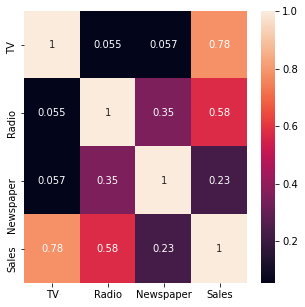

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising_multi.corr(),annot=True)

In [ ]:
x_train_new = x_train[['TV', 'Radio']]
x_test_new = x_test[['TV', 'Radio']]

In [ ]:
#fit the new model after removing Newspaper
lm.fit(x_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#making predictions
y_pred_new = lm.predict(x_test_new)

In [68]:
y_pred.shape

(140,)

[]

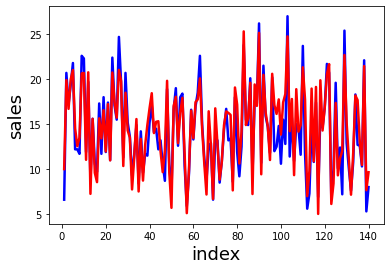

In [70]:
c = [i for i in range(1,141)]
plt.figure()
plt.plot(c , y_test, color='b',linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='r',linewidth=2.5, linestyle='-')
fig.suptitle('actual vs predicted', fontsize=20)
plt.xlabel('index', fontsize=18)
plt.ylabel('sales', fontsize=18)
plt.plot()

[]

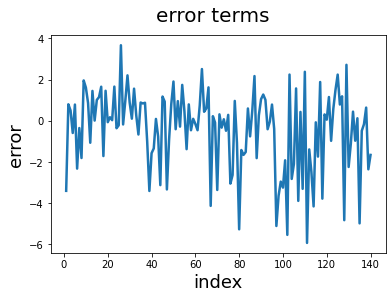

In [63]:
#error terms
fig = plt.figure()
c = [i for i in range(1,141)]
plt.plot(c,y_test-y_pred,linewidth=2.5,linestyle='-')
fig.suptitle('error terms', fontsize=20)
plt.xlabel('index', fontsize=18)
plt.ylabel('error',fontsize=18)
plt.plot()

In [51]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred_new)
r_squared = r2_score(y_test,y_pred_new)

In [52]:
print('mean square error is: ',mse)
print('r2 score is : ',r_squared)

mean square error is:  3.5155504882597897
r2 score is :  0.8437120423978353


In [54]:
x_train_final = x_train_new
x_train_final = sm.add_constant(x_train_final)
lm_final = sm.OLS(y_train,x_train_final).fit()

print(lm_final.summary())
#adjusted r square will pinalize any addition of new column

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     338.2
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           2.40e-32
Time:                        07:22:30   Log-Likelihood:                -117.28
No. Observations:                  60   AIC:                             240.6
Df Residuals:                      57   BIC:                             246.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2057      0.477      6.721      0.0

In [55]:
#so the equation will be 3.0257+0.0513*TV+0.1542*Radio